In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Canada's International Investment Positions

## Introduction

International Investment positions in each country is a key measure that determines the value of external assets and external liabilities. 

In this term, External assets refers to the value of overseas asset owned by a nation, and external liabilities refers to thevalue of its domestic assets owned by foreigners. 

## Definition

The Net international investment position (niip) is the difference between external assets and external liabilities.  
$$
NIIP = EA - EL
$$

if $NIIP>0$ then, it's said to be creditor and if $NNIP<0$ it is a debtor to the foreigners.

To simplify NIIP measures the Net External Wealth.

# Project

In this project we are going to look at the International Investment Position of Canada and analysis the changes of its External Asset, External Liabilities and consequently its Net External Wealth during 2015-2020.

First of all we take a look at our data:

In [9]:
df = pd.read_csv('36100412.csv')
display(df)

,REF_DATE,GEO,DGUID,Canada's international investment position,Geographic region,Currency,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2015-01,Canada,2016A000011124,Total assets,All countries,All currencies,Dollars,81,millions,6,v115115376,1.1.1.1,3757118.0,NaN,NaN,NaN,0
1,2015-01,Canada,2016A000011124,Total assets,All countries,Canadian dollar,Dollars,81,millions,6,v115115377,1.1.1.2,124252.0,NaN,NaN,NaN,0
2,2015-01,Canada,2016A000011124,Total assets,All countries,United States dollar,Dollars,81,millions,6,v115115378,1.1.1.3,2180042.0,NaN,NaN,NaN,0
3,2015-01,Canada,2016A000011124,Total assets,All countries,Euro,Dollars,81,millions,6,v115115379,1.1.1.4,357524.0,NaN,NaN,NaN,0
4,2015-01,Canada,2016A000011124,Total assets,All countries,United Kingdom pound sterling,Dollars,81,millions,6,v115115380,1.1.1.5,240332.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3009,2020-01,Canada,2016A000011124,Canada's net international investment position,All countries,United States dollar,Dollars,81,millions,6,v115115514,1.23.1.3,1911460.0,NaN,NaN,NaN,0
3010,2020-01,Canada,2016A000011124,Canada's net international investment position,All countries,Euro,Dollars,81,millions,6,v115115515,1.23.1.4,266305.0,NaN,NaN,NaN,0
3011,2020-01,Canada,2016A000011124,Canada's net international investment position,All countries,United Kingdom pound sterling,Dollars,81,millions,6,v115115516,1.23.1.5,230683.0,NaN,NaN,NaN,0
3012,2020-01,Canada,2016A000011124,Canada's net international investment position,All countries,Japanese yen,Dollars,81,millions,6,v115115517,1.23.1.6,111534.0,NaN,NaN,NaN,0


- The External Assets in the above table are:
 - Direct investment assets                                                 		
 - Canadian portfolio investment
 - Canadian portfolio investment, foreign debt securities
 - Canadian portfolio investment, foreign equity and investment fund shares
 - Official international reserves
 - Other Canadian investment
 - Other Canadian investment, loans
 - Other Canadian investment, currency and deposits
 - Other Canadian investment, trade credits and advances
 - Other Canadian investment, other accounts receivable
  



- The External Liabilities include:                                    		
 - Direct investment liabilities                                   		  
 - Foreign portfolio investment
 - Foreign portfolio investment, Canadian debt securities
 - Foreign portfolio investment, Canadian equity and investment fund shares
 - Other foreign investment
 - Other foreign investment, loans
 - Other foreign investment, currency and deposits
 - Other foreign investment, special drawing rights
 - Other foreign investment, trade credits and advances
 - Other foreign investment, other accounts payable

In [10]:
df.loc[~df.STATUS.isnull()][:]
main_cols = ["REF_DATE", "Canada's international investment position", "Currency", "VALUE"]
df.drop(columns= df.columns[~df.columns.isin(main_cols)], inplace=True)
df = df.loc[~df.VALUE.isnull()]

pd.to_datetime(df.REF_DATE)
df.set_index("REF_DATE", inplace= True)

df

,Canada's international investment position,Currency,VALUE
REF_DATE,,,
2015-01,Total assets,All currencies,3757118.0
2015-01,Total assets,Canadian dollar,124252.0
2015-01,Total assets,United States dollar,2180042.0
2015-01,Total assets,Euro,357524.0
2015-01,Total assets,United Kingdom pound sterling,240332.0
...,...,...,...
2020-01,Canada's net international investment position,United States dollar,1911460.0
2020-01,Canada's net international investment position,Euro,266305.0
2020-01,Canada's net international investment position,United Kingdom pound sterling,230683.0


As it's clear from the table above, the values have been cumulated according different currencies:

- Canadian dollar
- United States dollar
- United Kingdom pound sterling
- Japanese yen
- Other currencies

Which all of them have been aggregated in the "All Currencies" rows.

In [11]:
df.rename(columns={"Canada's international investment position":"ciip"}, inplace=True)
df.columns = [c.lower() for c in df.columns]
total_ciip = ["Total liabilities", "Total assets", "Canada's net international investment position"]
total_loc = df.ciip.isin(total_ciip)

level1_assets = ["Direct investment assets", "Canadian portfolio investment", "Official international reserves", 
                 "Other Canadian investment"]
l1a_loc = df.ciip.isin(level1_assets)

level1_liabilities = ["Direct investment liabilities", "Foreign portfolio investment", "Other foreign investment"]
l1l_loc = df.ciip.isin(level1_liabilities)


level2_assets = ["Direct investment assets", "Canadian portfolio investment, foreign debt securities", 
                 "Canadian portfolio investment, foreign equity and investment fund shares ", 
                 "Official international reserves", "Other Canadian investment, loans", 
                 "Other Canadian investment, currency and deposits", 
                 "Other Canadian investment, trade credits and advances", 
                 "Other Canadian investment, other accounts receivable"]
l2a_loc = df.ciip.isin(level2_assets)

level2_liabilities = ["Direct investment liabilities", "Foreign portfolio investment, Canadian debt securities", 
                     "Foreign portfolio investment, Canadian equity and investment fund shares", 
                     "Other foreign investment, loans", "Other foreign investment, currency and deposits", 
                     "Other foreign investment, special drawing rights", 
                     "Other foreign investment, trade credits and advances", 
                     "Other foreign investment, other accounts payable"]
l2l_loc = df.ciip.isin(level2_liabilities)

AttributeError: 'Line2D' object has no property 'xlabel'

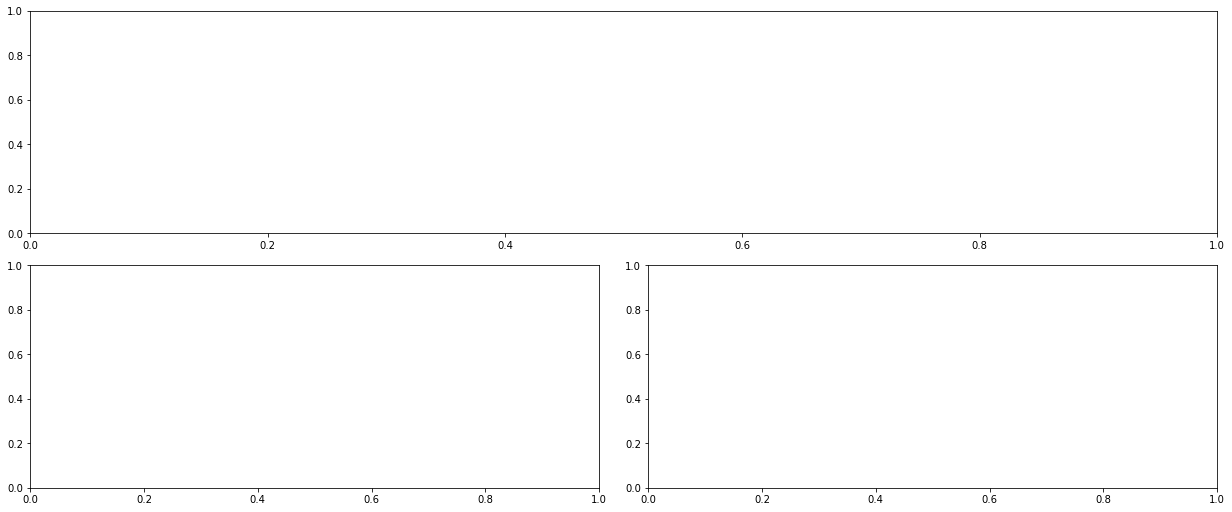

In [16]:
total_asset_df = df.loc[(df.ciip == "Total assets") & (df.currency == "All currencies")]
total_liab_df = df.loc[(df.ciip == "Total liabilities") & (df.currency == "All currencies")]
net_df = df.loc[(df.ciip == "Canada's net international investment position") & (df.currency == "All currencies")]

fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(2, 2)

f_ax1 = fig.add_subplot(gs[0, :])
f_ax2 = fig.add_subplot(gs[1, 0])
f_ax3 = fig.add_subplot(gs[1, 1])

fig.set_size_inches(17, 7)

total_asset_df.plot(ax=f_ax3, legend=False, xlabel=" ", color="black", linestyle=":", linewidth=3)

total_liab_df.plot(ax=f_ax2, legend=False, xlabel=" ", color="black", linestyle=":", linewidth=3)

net_df.plot(ax=f_ax1, legend=False, xlabel=" ", color="black", linestyle=":", linewidth=3)

f_ax3.set_title("Total Assets")
f_ax2.set_title("Total liabilities")
f_ax1.set_title("Canada's net international investment position");

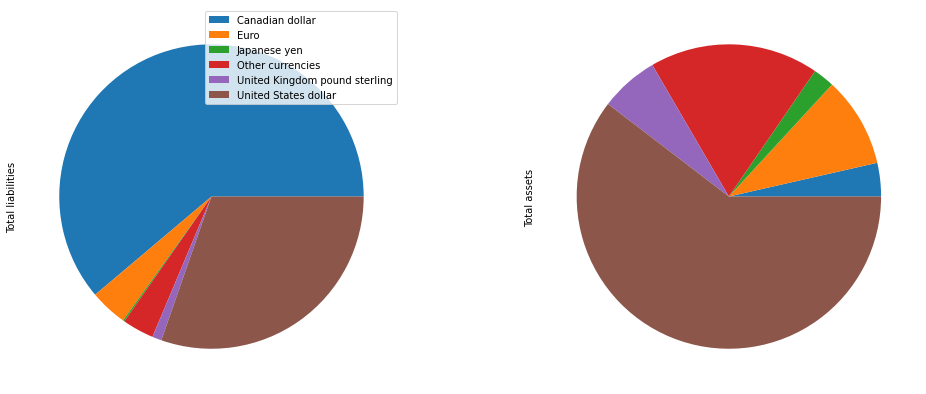

In [17]:
# Plot of Canada's average assets vs liabilities based on different currencies (including CAD)

total_plt_loc = (total_loc) & (df.currency != "All currencies")
total_ciip_df = df.loc[total_plt_loc].groupby(by=["ciip", "currency"]).mean().unstack("ciip")

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(17, 7)


total_ciip_df.iloc[:]["value"]["Total liabilities"].plot.pie(legend=True, labels=None,
ax=axes[0])

total_ciip_df.iloc[:]["value"]["Total assets"].plot.pie(legend=False, labels=None, ax=axes[1]);


AttributeError: 'Index' object has no attribute 'year'

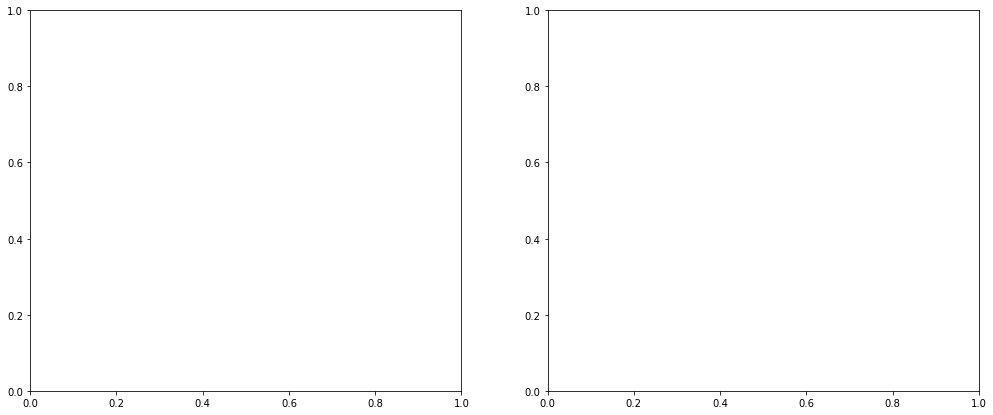

In [18]:
liab_df = df.loc[(l1l_loc) & (df.currency == "All currencies")]
asset_df = df.loc[(l1a_loc) & (df.currency == "All currencies")]

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(17, 7)

liab_df.groupby(by=[liab_df.index.year, "ciip"]).mean().value.unstack("ciip").plot.bar(ax=axes[1], 
ylabel=" ", xlabel=" ", legend=False)

liab_df.groupby("ciip").mean().value.plot.pie(ax=axes[0],legend=True, labels=None, ylabel="Total Liabilites");